<a href="https://colab.research.google.com/github/sayantan16/Deep-Learning-Sample-Images/blob/main/03_Comp_Vision_%26_CNN_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Functions

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
import pandas as pd

In [ ]:
# plotting the validation and training curves separately

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs we ran

  # Plot Loss
  plt.plot(epochs, loss, label="training loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot Accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [ ]:
# Visualizing the images

def view_random_image(target_dir, target_class):
  # setup the target directory
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image Shape: {img.shape}") # show the shape of the image

  return img

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model

def load_and_prep_image(filename, img_shape=224):
  """
  Read an image from filename and turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels)
  """

  # Read in the image
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  img = tf.image.decode_image(img)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Rescale the image and get all pixel values between 0 and 1
  img = img/255.

  return img

In [ ]:
# Fetching Data set

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-08-13 23:19:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.162.128, 74.125.31.128, 74.125.134.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.162.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   165MB/s    in 0.6s    

2023-08-13 23:19:24 (165 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# Class Names for Binary Classification

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))  # Create a list of class names from subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# Predict and Plot images from binary classification

def pred_and_plot(model, filename, class_names=class_names):
  """
  import an image located at filename, makes a prediction with model and plots the image with the predicted class as the title
  """

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Predicted class: {pred_class}")
  plt.axis(False)

In [ ]:
# Fetching Data set

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip the data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-08-13 23:19:31--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.162.128, 74.125.31.128, 74.125.134.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.162.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   153MB/s    in 3.4s    

2023-08-13 23:19:34 (147 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# Class Names for categorical Dataset

# Train and test directories

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

# Lets get the sub directories - class names
data_dir = pathlib.Path(train_dir)
class_names_2 = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names_2)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
# Predict and Plot images from categorical classification

def pred_and_plot_2(model, filename, class_names=class_names_2):
  """
  import an image located at filename, makes a prediction with model and plots the image with the predicted class as the title
  """

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Logic for multi-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Predicted class: {pred_class}")
  plt.axis(False)

# Introduction to Convolutional Neural Networks and Computer Vision using TensorFlow

## Get the data

In [ ]:
## Inspecting the data

!ls pizza_steak/

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
# List the number of files from the pizza_steak directory
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
# Another way to find out how many images in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

Getting the class names

Image Shape: (384, 512, 3)


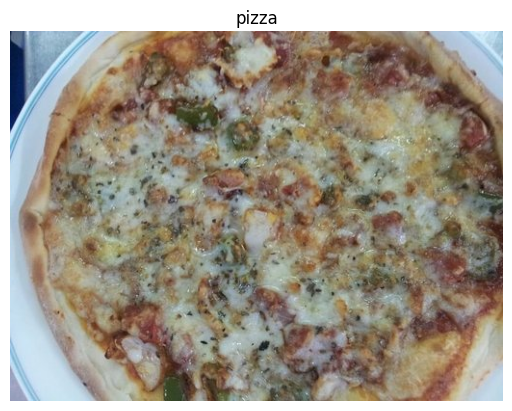

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

## An end to end example

Building a Convulutional Neural Network to find patterns in our images, more specifically we need to:
1. Load our images
2. Pre-process our images
3. Build a CNN to find patterns in our images
4. Compile our CNN
5. Fit the CNN to our training data

In [ ]:
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all pixel values between 0 & 1, this is also called Scaling/Normalisation)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 153s 3s/step - loss: 0.5885 - accuracy: 0.6940 - val_loss: 0.4707 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 147s 3s/step - loss: 0.4464 - accuracy: 0.8060 - val_loss: 0.3416 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 134s 3s/step - loss: 0.4042 - accuracy: 0.8227 - val_loss: 0.3490 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 141s 3s/step - loss: 0.3779 - accuracy: 0.8413 - val_loss: 0.3990 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 133s 3s/step - loss: 0.3601 - accuracy: 0.8500 - val_loss: 0.3420 - val_accuracy: 0.8420


In [ ]:
# Found 1500 images belonging to 2 classes.
# Found 500 images belonging to 2 classes.
# Epoch 1/5
# 47/47 [==============================] - 118s 2s/step - loss: 0.5491 - accuracy: 0.7247 - val_loss: 0.4180 - val_accuracy: 0.8300
# Epoch 2/5
# 47/47 [==============================] - 114s 2s/step - loss: 0.4461 - accuracy: 0.8060 - val_loss: 0.3800 - val_accuracy: 0.8340
# Epoch 3/5
# 47/47 [==============================] - 124s 3s/step - loss: 0.4173 - accuracy: 0.8193 - val_loss: 0.3754 - val_accuracy: 0.8460
# Epoch 4/5
# 47/47 [==============================] - 123s 3s/step - loss: 0.3874 - accuracy: 0.8380 - val_loss: 0.3644 - val_accuracy: 0.8380
# Epoch 5/5
# 47/47 [==============================] - 113s 2s/step - loss: 0.3239 - accuracy: 0.8720 - val_loss: 0.3269 - val_accuracy: 0.8560

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

## Checking to see if the Classification problem model will be of help in this case

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the classification problem model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 220ms/step - loss: 2.0272 - accuracy: 0.5147 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 213ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 209ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 10)                1505290   
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,505,411
Trainable params: 1,505,411
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Re creating the model with higher number of hidden layers

# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the classification problem model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 21s 415ms/step - loss: 2.8776 - accuracy: 0.6240 - val_loss: 2.2589 - val_accuracy: 0.5000
Epoch 2/10
47/47 [==============================] - 22s 460ms/step - loss: 0.9867 - accuracy: 0.6787 - val_loss: 0.5252 - val_accuracy: 0.7820
Epoch 3/10
47/47 [==============================] - 23s 485ms/step - loss: 0.5730 - accuracy: 0.7553 - val_loss: 1.5562 - val_accuracy: 0.5520
Epoch 4/10
47/47 [==============================] - 20s 425ms/step - loss: 0.7117 - accuracy: 0.7253 - val_loss: 0.4665 - val_accuracy: 0.7620
Epoch 5/10
47/47 [==============================] - 19s 412ms/step - loss: 0.5332 - accuracy: 0.7733 - val_loss: 0.4848 - val_accuracy: 0.7600
Epoch 6/10
47/47 [==============================] - 21s 450ms/step - loss: 0.4733 - accuracy: 0.7840 - val_loss: 0.4249 - val_accuracy: 0.8000
Epoch 7/10
47/47 [==============================] - 19s 408ms/step - loss: 0.4426 - accuracy: 0.7993 - val_loss: 0.7169 - val_accuracy: 0.6380

In [ ]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 100)               15052900  
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


### Visualize the data

Image Shape: (384, 512, 3)
Image Shape: (512, 512, 3)


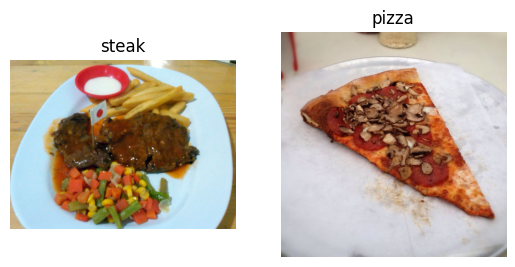

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### Pre-Process the data

In [ ]:
# Define the directory dataset paths

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Turn Data into **Batches**

A batch is a small subset of data. eg. - 32

In [ ]:
# Create train and test data generators and rescale the data
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # type of data ur working with
                                               batch_size=32) # size of minibatches to load data into

test_data = train_datagen.flow_from_directory(directory=test_dir,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of data train batch

images, labels = train_data.next() # get the next batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches
len(train_data)

47

In [ ]:
# Get the 1st 2 images
images[:1], images[0].shape

(array([[[[0.08627451, 0.04313726, 0.05882353],
          [0.1137255 , 0.06666667, 0.07450981],
          [0.14901961, 0.09019608, 0.07843138],
          ...,
          [0.0509804 , 0.02745098, 0.03529412],
          [0.0509804 , 0.02745098, 0.03529412],
          [0.0509804 , 0.02745098, 0.03529412]],
 
         [[0.1254902 , 0.09019608, 0.05490196],
          [0.16862746, 0.11764707, 0.08627451],
          [0.22352943, 0.15686275, 0.1254902 ],
          ...,
          [0.0509804 , 0.02745098, 0.03529412],
          [0.0509804 , 0.02745098, 0.03529412],
          [0.0509804 , 0.02745098, 0.03529412]],
 
         [[0.13725491, 0.10196079, 0.04313726],
          [0.18039216, 0.1254902 , 0.07450981],
          [0.227451  , 0.16470589, 0.10588236],
          ...,
          [0.05882353, 0.02352941, 0.03529412],
          [0.05882353, 0.02352941, 0.03529412],
          [0.05882353, 0.02352941, 0.03529412]],
 
         ...,
 
         [[0.9490197 , 0.9607844 , 0.8941177 ],
          [0.99215

In [ ]:
# View the 1st batch of labels
labels

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

### Create a CNN Model (starting with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment, then you try to beat the baseline.

In [ ]:
# Create the baseline (this will be a three layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)), # Input layer - specify the input shape
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # Output layer - working with binary classification so only 1 output
])

In [ ]:
# Compile the model

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

### Fit the model

In [ ]:
# Check the length of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # this is combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 161s 3s/step - loss: 0.9505 - accuracy: 0.6953 - val_loss: 0.4090 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 164s 3s/step - loss: 0.3724 - accuracy: 0.8427 - val_loss: 0.4530 - val_accuracy: 0.7720
Epoch 3/5
47/47 [==============================] - 159s 3s/step - loss: 0.2211 - accuracy: 0.9293 - val_loss: 0.3440 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 162s 3s/step - loss: 0.0972 - accuracy: 0.9807 - val_loss: 0.4814 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 162s 3s/step - loss: 0.0249 - accuracy: 0.9980 - val_loss: 0.4359 - val_accuracy: 0.8240


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 14s 872ms/step - loss: 0.3420 - accuracy: 0.8420


[0.34200751781463623, 0.8420000076293945]

In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 16s 920ms/step - loss: 0.4359 - accuracy: 0.8240


[0.4358666241168976, 0.8240000009536743]

### Evaluating the model



<Axes: >

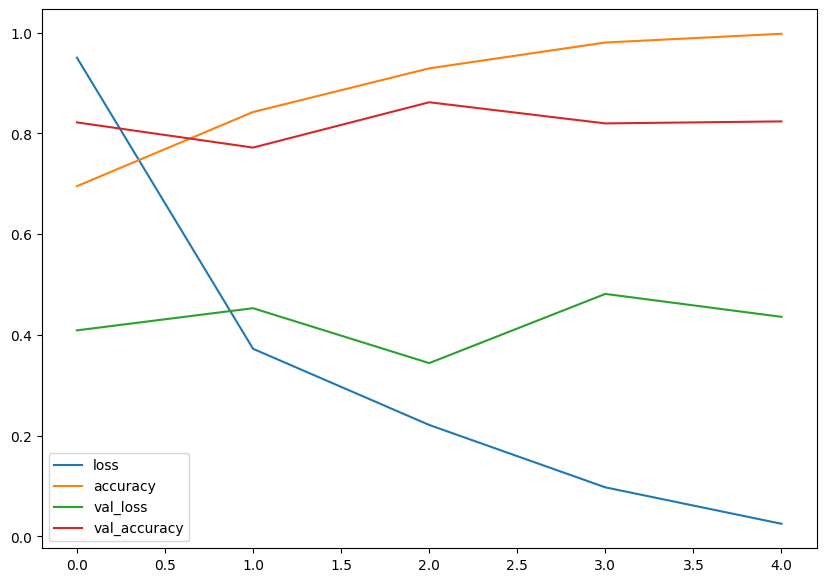

In [ ]:
# Plotting the training curves
pd.DataFrame(history_4.history).plot(figsize=(10,7))

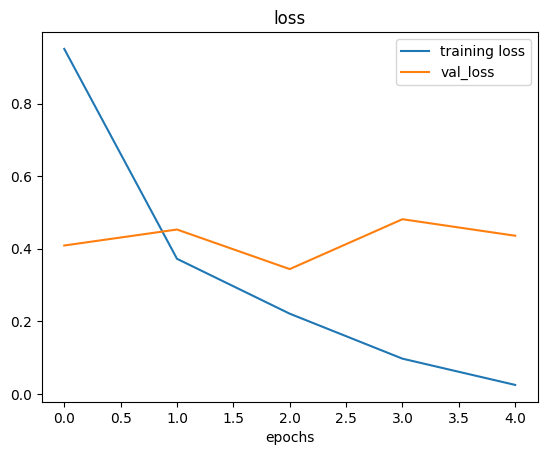

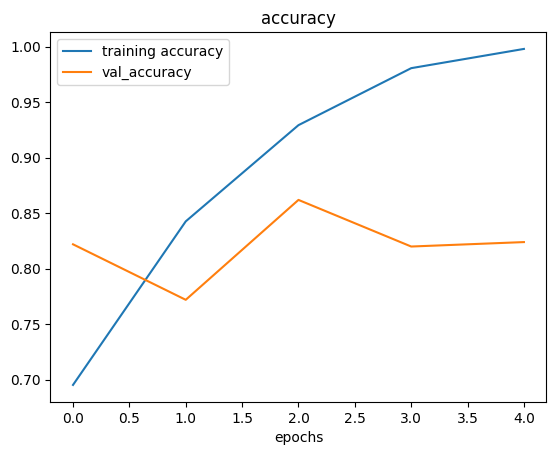

In [ ]:
# Loss and Accuracy of Model 4
plot_loss_curves(history=history_4)

When a model's validation loss starts to increase, its likely that the model is overfitting the training dataset. This means, its learning the patterns in the training dataset too well and thus the model's ability to generalise to unseen data will be diminished

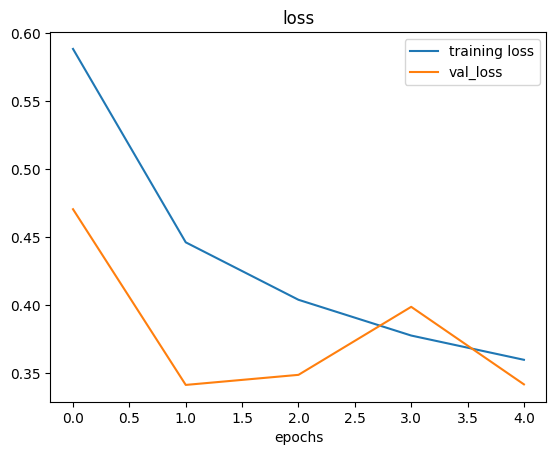

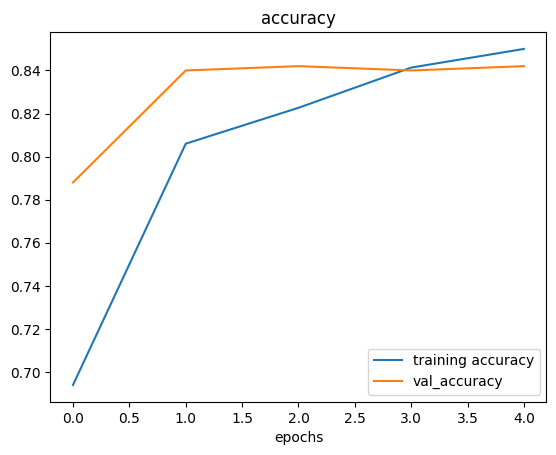

In [ ]:
# Loss and Accuracy of Model 1
plot_loss_curves(history=history_1)

### Adjust the model parameters

Fitting the machine learning model comes in 3 steps:
1. Create a baseline model
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting

Ways to induce overfitting:
1. Increase the number of conv layers
2. Increase the number of conv filters
3. Add another dense layer to the output of our flattened layer

Ways to reduce the overfitting:
1. Add data augmentation
2. Add regulation layers (such as MaxPool2D)
3. Add more data...

Reducing overfitting is also known as **Regularization**

In [ ]:
# Create the model (new baseline model)

model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 66s 1s/step - loss: 0.6383 - accuracy: 0.6153 - val_loss: 0.4685 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 64s 1s/step - loss: 0.4415 - accuracy: 0.8033 - val_loss: 0.3687 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 65s 1s/step - loss: 0.3989 - accuracy: 0.8240 - val_loss: 0.3297 - val_accuracy: 0.8740
Epoch 4/5
47/47 [==============================] - 65s 1s/step - loss: 0.3886 - accuracy: 0.8280 - val_loss: 0.3140 - val_accuracy: 0.8880
Epoch 5/5
47/47 [==============================] - 67s 1s/step - loss: 0.3471 - accuracy: 0.8453 - val_loss: 0.3171 - val_accuracy: 0.8760


In [ ]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 10)      

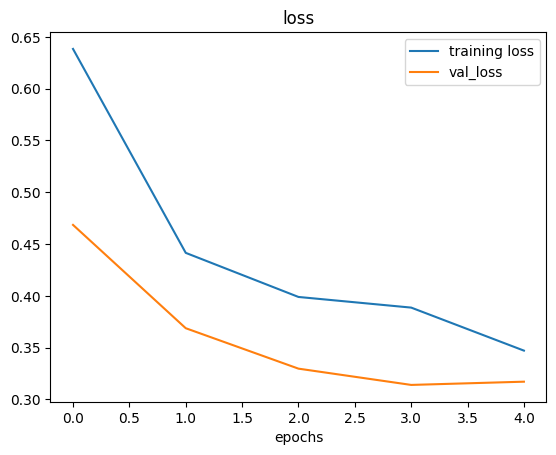

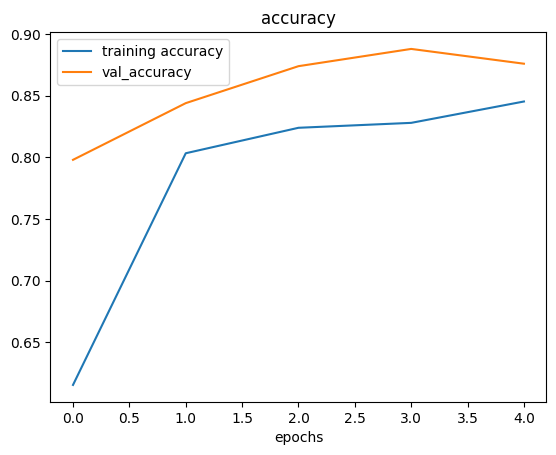

In [ ]:
plot_loss_curves(history=history_5)

### Finding Data Augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation

train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test data set

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory

print("Augmented training data: ")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non augmented trained batches

print("Non-augmented training data: ")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches
print("non-augmented test data: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented training data: 
Found 1500 images belonging to 2 classes.
non-augmented test data: 
Found 500 images belonging to 2 classes.


### Visualizing Augmented Data

In [ ]:
# Get sample augmented data

images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # labels are not augmented only images are

showing image number: 27
showing image number: 27


(-0.5, 223.5, 223.5, -0.5)

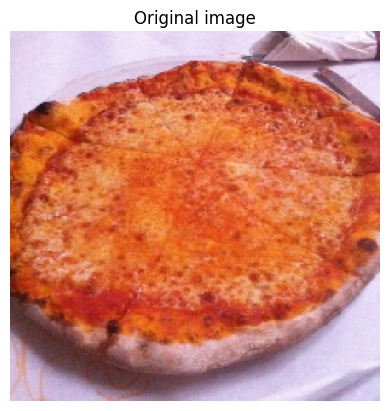

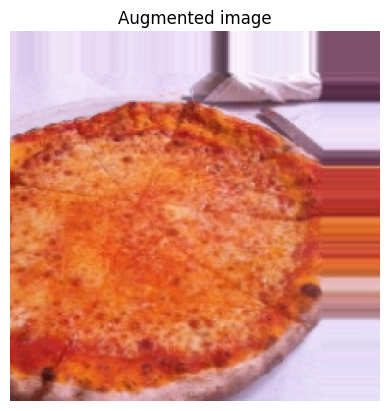

In [ ]:
# Show original image and augmented image

random_number = random.randint(0, 32) # since our batch sizes are 32
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
print(f"showing image number: {random_number}")
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

### Building a model on augmented data

In [ ]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # Fitting model 6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 86s 2s/step - loss: 0.7573 - accuracy: 0.4327 - val_loss: 0.6831 - val_accuracy: 0.5480
Epoch 2/5
47/47 [==============================] - 83s 2s/step - loss: 0.6909 - accuracy: 0.5327 - val_loss: 0.6733 - val_accuracy: 0.6840
Epoch 3/5
47/47 [==============================] - 81s 2s/step - loss: 0.7014 - accuracy: 0.5413 - val_loss: 0.6764 - val_accuracy: 0.7080
Epoch 4/5
47/47 [==============================] - 81s 2s/step - loss: 0.6880 - accuracy: 0.5227 - val_loss: 0.6526 - val_accuracy: 0.6680
Epoch 5/5
47/47 [==============================] - 83s 2s/step - loss: 0.6687 - accuracy: 0.5867 - val_loss: 0.5970 - val_accuracy: 0.6280


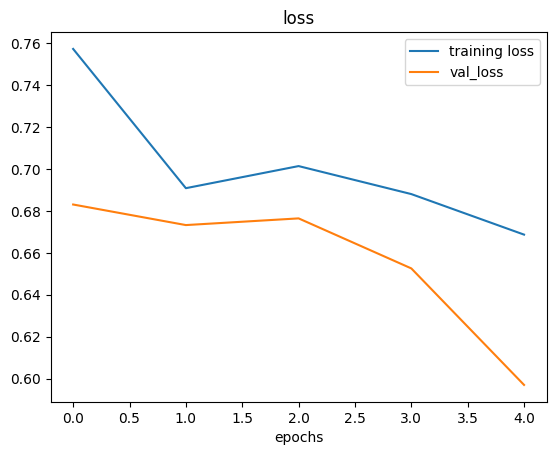

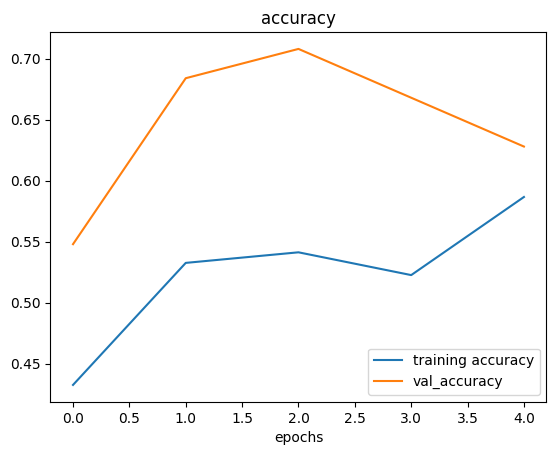

In [ ]:
# Model 6 training curves

plot_loss_curves(history=history_6)

Shuffling the augmented data and train another model (the same as before) on it

In [ ]:
# Import data and augment it and shuffle it from directory

train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model same as model_6
model_7 = Sequential([
    Conv2D(32, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(32, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
            epochs=5,
            steps_per_epoch=len(train_data_augmented_shuffled),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 162s 3s/step - loss: 0.6569 - accuracy: 0.6007 - val_loss: 0.5395 - val_accuracy: 0.7100
Epoch 2/5
47/47 [==============================] - 159s 3s/step - loss: 0.5471 - accuracy: 0.7153 - val_loss: 0.4003 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 152s 3s/step - loss: 0.4907 - accuracy: 0.7693 - val_loss: 0.4329 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 151s 3s/step - loss: 0.4708 - accuracy: 0.7820 - val_loss: 0.3363 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 160s 3s/step - loss: 0.4475 - accuracy: 0.7853 - val_loss: 0.3271 - val_accuracy: 0.8800


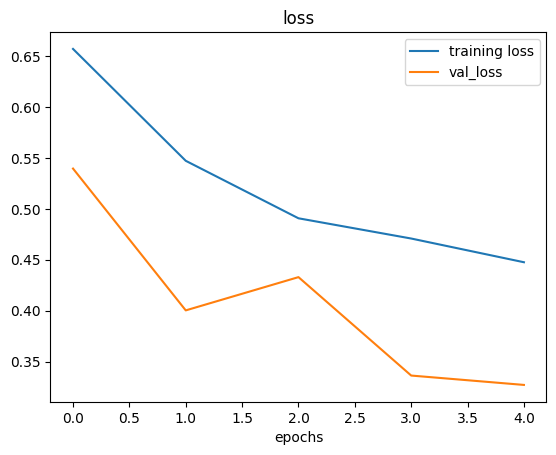

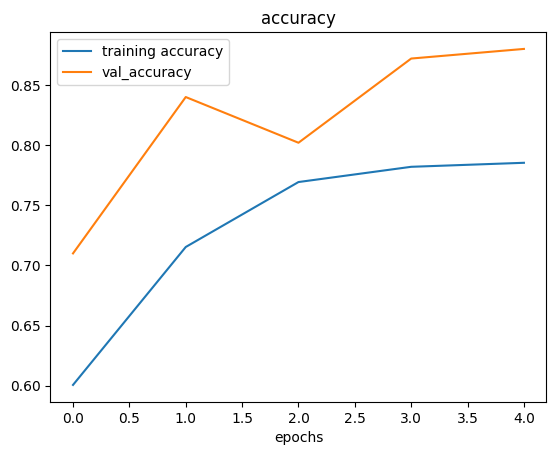

In [ ]:
# Plot loss curve for Model 7
plot_loss_curves(history=history_7)

### Options to Improve the Model

Steps already covered, a few options left are:

1. Increase the number of model layers - Conv2D/MaxPool2D layers
2. Increase the number of filters in each conv layer - 10 to 32/64
3. Train for longer - epochs - 10/20
4. Find the ideal learning rate
5. Get more learning data
6. Use **Transfer Learning** - use another learned model to augment the learning

# Making a prediction with our trained model on our own custom data

In [ ]:
# Classes to work with
print(class_names)

['pizza' 'steak']


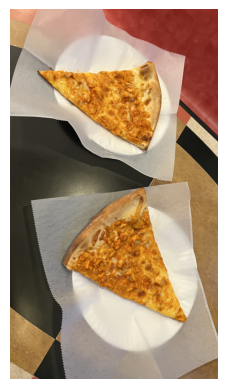

In [ ]:
# View our example image
pizza = mpimg.imread("/content/drive/MyDrive/Colab Notebooks/Pizza_sample_1.jpeg")
plt.imshow(pizza)
plt.axis(False);

In [ ]:
# Shape of the image
pizza.shape

(4032, 2268, 3)

In [ ]:
# Load and preprocess our custom image
pizza = load_and_prep_image("/content/drive/MyDrive/Colab Notebooks/Pizza_sample_3.jpeg")
pizza

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.48828533, 0.38439876, 0.3177321 ],
        [0.78066224, 0.7139956 , 0.60006005],
        [0.8775911 , 0.8226891 , 0.6854342 ],
        ...,
        [0.41748732, 0.3562727 , 0.28829843],
        [0.36638683, 0.30364174, 0.20973425],
        [0.3198208 , 0.25791603, 0.2060953 ]],

       [[0.7165691 , 0.6126826 , 0.5460159 ],
        [0.6415616 , 0.57489496, 0.4609594 ],
        [0.9342187 , 0.87931675, 0.74206185],
        ...,
        [0.6251134 , 0.55844676, 0.45557058],
        [0.5410447 , 0.4586918 , 0.38005027],
        [0.3403462 , 0.27442253, 0.21209006]],

       [[0.61581135, 0.5569177 , 0.458831  ],
        [0.6267232 , 0.54097635, 0.46499348],
        [0.8356092 , 0.7536064 , 0.6591386 ],
        ...,
        [0.45442033, 0.35131168, 0.26188564],
        [0.361195  , 0.30062565, 0.22404997],
        [0.44759116, 0.34563035, 0.28680682]],

       ...,

       [[0.8199879 , 0.61214477, 0.45528197],
        [0.67

In [ ]:
pred = model_7.predict(tf.expand_dims(pizza, axis=0))
pred

1/1 [==============================] - 0s 259ms/step


array([[0.3657141]], dtype=float32)

### Visualizing the predictions

In [ ]:
# Class Names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
int(tf.round(pred))

0

In [ ]:
# index the predicted class by rounding the prediction probability and indexing on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'pizza'

1/1 [==============================] - 0s 65ms/step


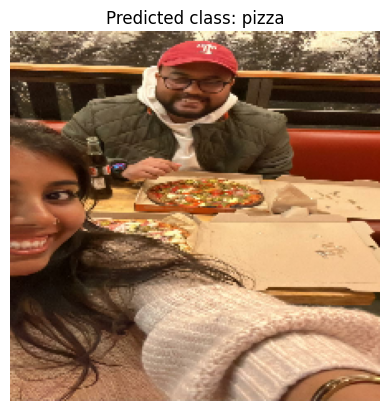

In [ ]:
# test the model in the custom image
pred_and_plot(model_7, "/content/drive/MyDrive/Colab Notebooks/Pizza_sample_3.jpeg")

# Multi Class Image Classification Problem

In this example, we will work with 10 classes of food

1. Check the Data
2. Preprocess the data
3. Create the model - start with a baseline
4. Fit the model - overfit it to make sure it works
5. Evaluate the model
6. Adjust the hyperparameters - improve the model to beat the baseline
7. Repeat until satisfied

## 1. Check the data - import and check

In [ ]:
# Walkthrough the 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 

In [ ]:
# Train and test directories

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image Shape: (512, 512, 3)


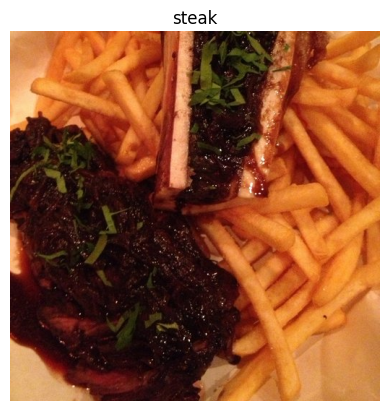

In [ ]:
# Using tensorflow ImageDataGenerator

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names_2))

## 2. Preprocess the data

In [ ]:
# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model

Replicating the CNN explainer model for 10 classes of images

In [ ]:
# Create our model (a clone of model_8, except to be multi-class)
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_8.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

KeyboardInterrupt: ignored

## 5. Evaluate the model

In [ ]:
# Evaluate on the test data

model_8.evaluate(test_data)

In [ ]:
# Model 8 loss curves

plot_loss_curves(history=history_8)

The loss curve shows that the model is overfitting.
The model shows good result on the training data but is not able to generalise on the test data ie, data it has not seen before and performs poorly on those.

## 6. Adjust the model hyperparameters to beat the baseline/reduce overfitting

Fixing overfitting:

1. Get more data
2. Simplify the model - removing some of the layers
3. Data augmentation - adding more diversity to train the data without altering the original data
4. Use Transfer Learning - leverages on the other models which have trained on other dataset and use that pattern on those.

In [ ]:
# Simply the model

# Create a new Model
model_9 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_9.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
model_8.summary()

In [ ]:
model_9.summary()

In [ ]:
# Plotting the loss curve of model 9

plot_loss_curves(history=history_9)

Even after reducing the conv layer from model 8, the number of parameters have increased in model 9.

Trying data augmentation to reduce overfit

### Trying to reduce overfitting with data augmentation

In [ ]:
# Create an augmented data generator instance

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
# Create another model to fit with the augmented training data
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_10.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 741s 3s/step - loss: 2.1935 - accuracy: 0.1920 - val_loss: 2.1011 - val_accuracy: 0.2584
Epoch 2/5
235/235 [==============================] - 757s 3s/step - loss: 2.0620 - accuracy: 0.2725 - val_loss: 1.9571 - val_accuracy: 0.3092
Epoch 3/5
235/235 [==============================] - 751s 3s/step - loss: 2.0258 - accuracy: 0.2820 - val_loss: 1.8952 - val_accuracy: 0.3372
Epoch 4/5
235/235 [==============================] - 783s 3s/step - loss: 1.9668 - accuracy: 0.3100 - val_loss: 1.8918 - val_accuracy: 0.3412
Epoch 5/5
235/235 [==============================] - 755s 3s/step - loss: 1.9384 - accuracy: 0.3231 - val_loss: 1.7631 - val_accuracy: 0.3888


In [ ]:
model_10.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 68s 855ms/step - loss: 1.7631 - accuracy: 0.3888


[1.7631382942199707, 0.3887999951839447]

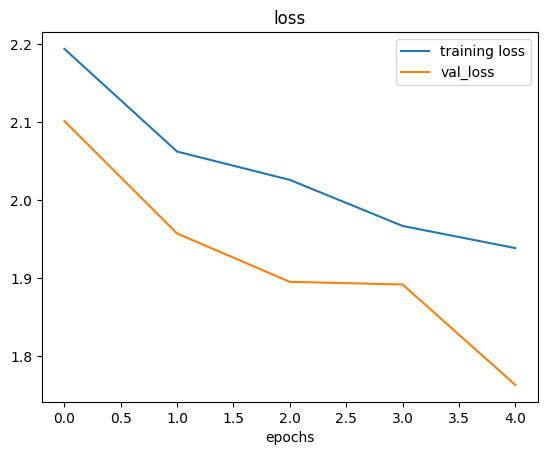

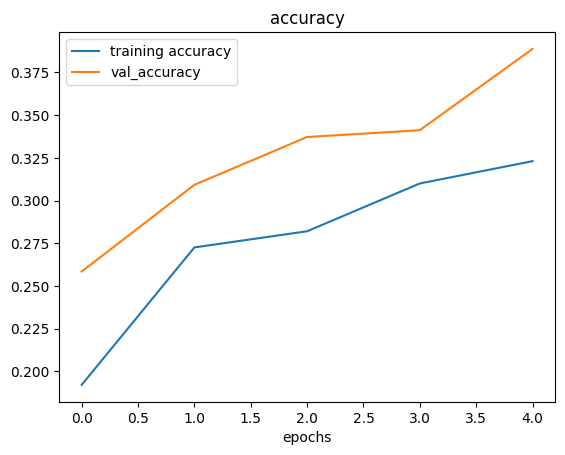

In [ ]:
plot_loss_curves(history=history_10)

In [ ]:
class_names_2

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

## Testing with Custom Images

1/1 [==============================] - 0s 43ms/step


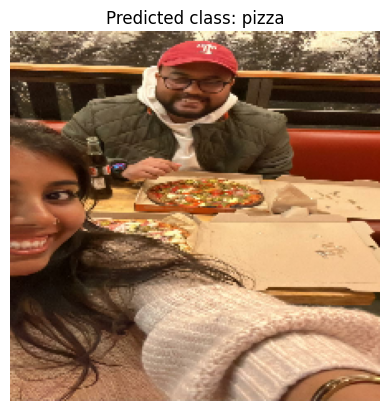

In [ ]:
# test the model in the custom image

pred_and_plot_2(model_10, "/content/drive/MyDrive/Colab Notebooks/Pizza_sample_3.jpeg")

1/1 [==============================] - 0s 135ms/step


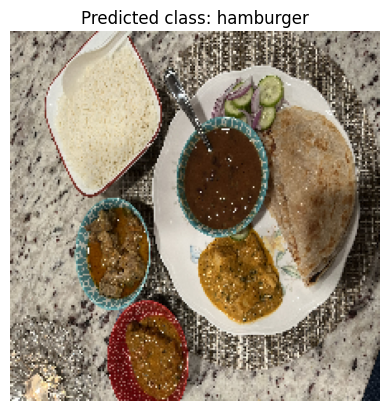

In [ ]:
# test the model in the custom image

pred_and_plot_2(model_10, "/content/drive/MyDrive/Colab Notebooks/chicken_curry_sample_1.jpeg")

1/1 [==============================] - 0s 180ms/step


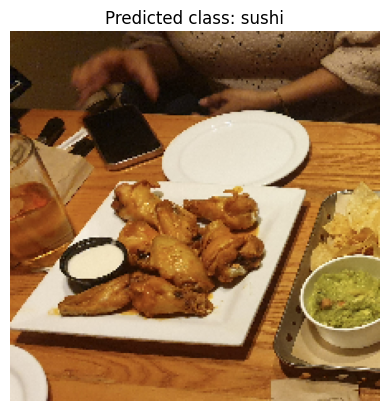

In [ ]:
# test the model in the custom image

pred_and_plot_2(model_10, "/content/drive/MyDrive/Colab Notebooks/chicken_wings_sample_1.jpeg")

1/1 [==============================] - 0s 58ms/step


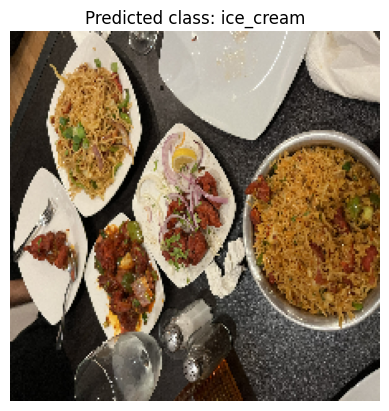

In [ ]:
# test the model in the custom image

pred_and_plot_2(model_10, "/content/drive/MyDrive/Colab Notebooks/fried_rice_sample_1.jpeg")

1/1 [==============================] - 0s 73ms/step


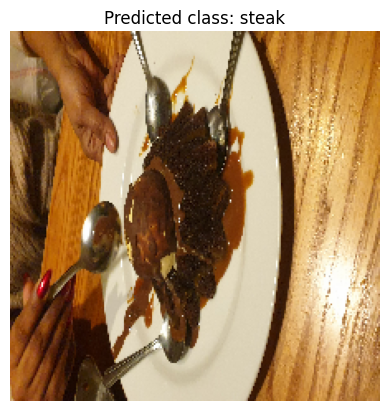

In [ ]:
# test the model in the custom image

pred_and_plot_2(model_10, "/content/drive/MyDrive/Colab Notebooks/ice_cream_sample_1.jpeg")

## Save and load our model

In [ ]:
# Save a model

model_10.save("saved_trained_model_10")

In [ ]:
# Load a saved model

loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 67s 833ms/step - loss: 1.7631 - accuracy: 0.3888


[1.7631386518478394, 0.3887999951839447]